In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from config import t_key
from config import t_secret
from config import bearer_token

In [2]:
#import jellyfish data
jelly_data=pd.read_csv("./Data/jelly_year_month_04-11.csv")

In [3]:
jelly_data

,Month,Jellyfish Sightings,Jellyfish Sightings (1000s)
0,Jan. '04,419,0.419
1,Feb. '04,400,0.400
2,Mar. '04,763,0.763
3,Apr. '04,364,0.364
4,May '04,742,0.742
...,...,...,...
91,Aug. '11,0,0.000
92,Sep. '11,8,0.008
93,Oct. '11,0,0.000
94,Nov. '11,0,0.000


In [4]:
#import google search data
search_data=pd.read_csv("./Data/jelly_search.csv")

In [5]:
search_data

,Month,Relative Popularity
0,Jan. '04,44
1,Feb. '04,49
2,Mar. '04,61
3,Apr. '04,64
4,May '04,61
...,...,...
91,Aug. '11,78
92,Sep. '11,62
93,Oct. '11,54
94,Nov. '11,54


In [6]:
#merge data
merged_df=pd.DataFrame({"Year-Month":search_data["Month"],
                       "Relative Search Popularity":search_data["Relative Popularity"],
                        "Number of Jellyfish Seen":jelly_data["Jellyfish Sightings (1000s)"]
                       })
merged_df

,Year-Month,Relative Search Popularity,Number of Jellyfish Seen
0,Jan. '04,44,0.419
1,Feb. '04,49,0.400
2,Mar. '04,61,0.763
3,Apr. '04,64,0.364
4,May '04,61,0.742
...,...,...,...
91,Aug. '11,78,0.000
92,Sep. '11,62,0.008
93,Oct. '11,54,0.000
94,Nov. '11,54,0.000


Text(0, 0.5, 'Relative Google Popularity')

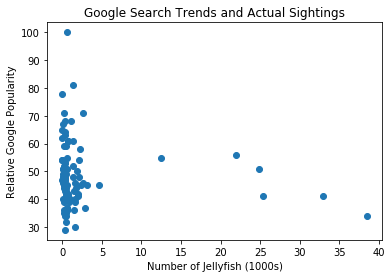

In [7]:
#plot the data
y=merged_df["Relative Search Popularity"]
x=merged_df["Number of Jellyfish Seen"]
plt.scatter(x,y)
plt.title("Google Search Trends and Actual Sightings")
plt.xlabel("Number of Jellyfish (1000s)")
plt.ylabel("Relative Google Popularity")
#plt.plot(jelly_data["Year"],jelly_data["Jellyfish Sightings (1000s)"])

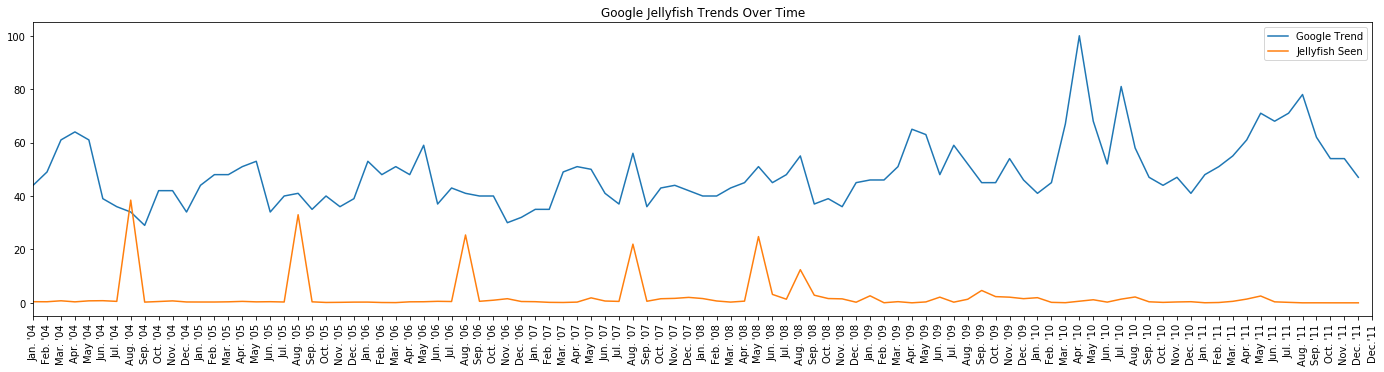

In [8]:
#display the data over time, to see the differences
fig = plt.figure(figsize=(24, 6))
x=merged_df["Year-Month"]

plt.plot(x,merged_df["Relative Search Popularity"],label="Google Trend")
plt.plot(x,merged_df["Number of Jellyfish Seen"],label="Jellyfish Seen")
plt.legend()
plt.title("Google Jellyfish Trends Over Time")
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=.2)
plt.xlim("Jan. '04","Dec.'11")
plt.show()

In [9]:
#import different version of google trend data which better matches next analysis
google_trends=pd.read_csv("./Data/jelly_search_annualMAX.csv")

In [10]:
google_trends

,Year,Max Annual Popularity
0,2004,64
1,2005,53
2,2006,59
3,2007,56
4,2008,55
5,2009,65
6,2010,100
7,2011,78


In [11]:
#import fishing activity csv
fishing_activity=pd.read_csv("./Data/fishing_totals_v3.csv")

In [12]:
fishing_activity

,Year,Tonnes of Fish Caught (mil)
0,2004,94.189425
1,2005,93.722945
2,2006,91.266072
3,2007,91.595723
4,2008,90.735438
5,2009,90.179845
6,2010,88.213197
7,2011,92.776109


In [13]:
#create new DF containing both sets of data
merged_df2=pd.DataFrame({"Year":fishing_activity["Year"],
                        "Tonnes of Fish Caught (mil)":fishing_activity["Tonnes of Fish Caught (mil)"],
                         "Google Search Trend":google_trends["Max Annual Popularity"]
                        })
merged_df2

,Year,Tonnes of Fish Caught (mil),Google Search Trend
0,2004,94.189425,64
1,2005,93.722945,53
2,2006,91.266072,59
3,2007,91.595723,56
4,2008,90.735438,55
5,2009,90.179845,65
6,2010,88.213197,100
7,2011,92.776109,78


Text(0.5, 1.0, 'Search Trends vs. Fish Caught')

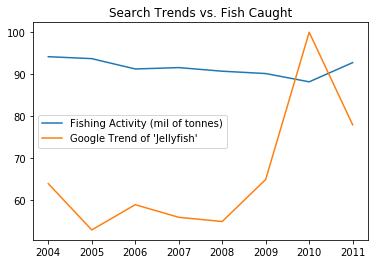

In [14]:
#plot google trends versus fishing activity
x1=merged_df2["Year"]

plt.plot(x1,merged_df2["Tonnes of Fish Caught (mil)"],label="Fishing Activity (mil of tonnes)")
plt.plot(x1,merged_df2["Google Search Trend"],label="Google Trend of 'Jellyfish'")
plt.legend()
plt.title("Search Trends vs. Fish Caught")